# Regression Model for International Education Costs

This model is going to predict the price of tuition on different universities worldwide. It takes data from a given .csv file which derives from different universities. The data includes quantitative and qualitative features such as Tuition cost, Years to complete, rent amount and Country, Cities and Programs respectively.

This model uses PyTorch, Pandas, Numpy, Scikit-Learn and Seaborn to complete. It takes in data and converts it into a Pandas dataframe. From there, the data was scrutinized to ensure no nulls or outliers are present. The model was built with an input layer, an output layer and one hidden layer. It's a regression model focused on the Tuition amounts. 

## Step 1: Data Loading & Data Analysis

In [63]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

sns.set_style("whitegrid")

In [64]:
#Data Load from Kaggle
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
# import kagglehub
# from kagglehub import KaggleDatasetAdapter

# # Set the path to the file you'd like to load
# file_path = "C:\\AI\\Python Projects\\International_Education_Costs.csv"

# # Load the latest version
# df = kagglehub.load_dataset(
#   KaggleDatasetAdapter.PANDAS,
#   "adilshamim8/cost-of-international-education",
#   file_path,
#   # Provide any additional arguments like 
#   # sql_query or pandas_kwargs. See the 
#   # documenation for more information:
#   # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
# )

# # Download latest version
# path = kagglehub.dataset_download("adilshamim8/cost-of-international-education")

# print("Path to dataset files:", path)

# Data Load Locally
#Define the data path
data_path = 'C:/AI/Python Projects/International_Education_Costs.csv'


#load the data into a dataframe
try:
    df=pd.read_csv(data_path)
    print("data loaded successfully")
except FileNotFoundError:
    print(f"File not found at {data_path}")
except Exception as e:
    print(f"an error occurred while loading: {e}")

data loaded successfully


In [65]:
#check the data
if'df' in locals():
    print("First 5 rows of the dataset")
    print(df.head())
    print("Data types of the columns")
    print(df.dtypes)
    print("Shape of the dataset")
    print(df.shape)
    print("Missing values in the dataset")
    print(df.isnull().sum())
    

First 5 rows of the dataset
     Country       City                      University  \
0        USA  Cambridge              Harvard University   
1         UK     London         Imperial College London   
2     Canada    Toronto           University of Toronto   
3  Australia  Melbourne         University of Melbourne   
4    Germany     Munich  Technical University of Munich   

                  Program   Level  Duration_Years  Tuition_USD  \
0        Computer Science  Master             2.0        55400   
1            Data Science  Master             1.0        41200   
2      Business Analytics  Master             2.0        38500   
3             Engineering  Master             2.0        42000   
4  Mechanical Engineering  Master             2.0          500   

   Living_Cost_Index  Rent_USD  Visa_Fee_USD  Insurance_USD  Exchange_Rate  
0               83.5      2200           160           1500           1.00  
1               75.8      1800           485            800       

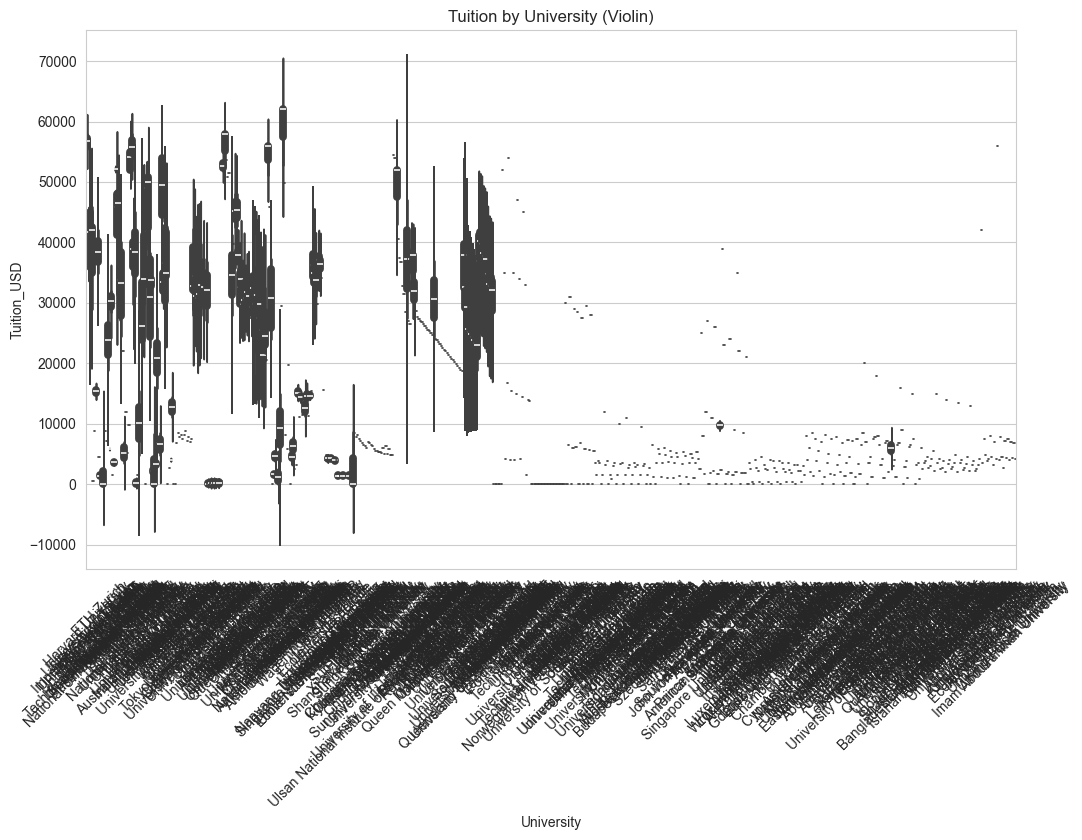

In [66]:
plt.figure(figsize=(12, 7))
sns.violinplot(x='University', y='Tuition_USD', data=df)
plt.title('Tuition by University (Violin)')
plt.xticks(rotation=45)
plt.show()


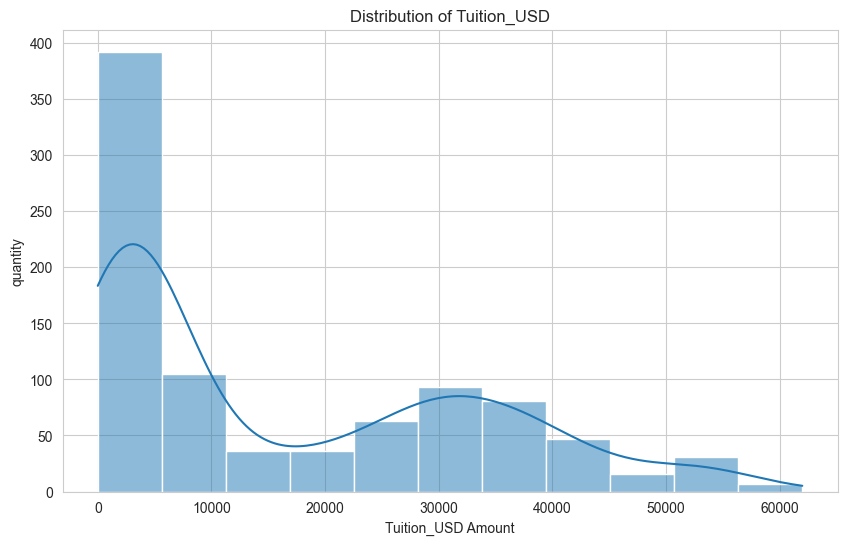

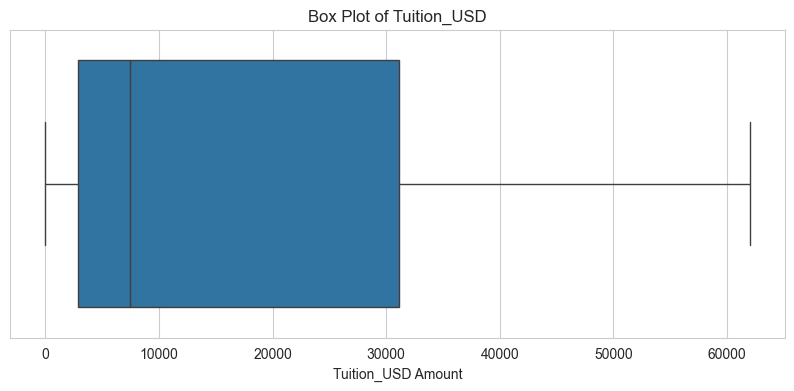

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Tuition_USD'], kde=True) # kde=True adds a density curve
plt.title('Distribution of Tuition_USD')
plt.xlabel('Tuition_USD Amount')
plt.ylabel('quantity')
plt.show() # Display the plot

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Tuition_USD'])
plt.title('Box Plot of Tuition_USD')
plt.xlabel('Tuition_USD Amount')
plt.show()


In [68]:
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numerical_df.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)



Correlation Matrix:
                   Duration_Years  Tuition_USD  Living_Cost_Index  Rent_USD  \
Duration_Years           1.000000     0.140232          -0.068300  0.051565   
Tuition_USD              0.140232     1.000000           0.396830  0.724445   
Living_Cost_Index       -0.068300     0.396830           1.000000  0.811128   
Rent_USD                 0.051565     0.724445           0.811128  1.000000   
Visa_Fee_USD             0.017424     0.522490           0.256820  0.374079   
Insurance_USD            0.065670     0.582407           0.754393  0.776770   
Exchange_Rate            0.020097    -0.116710          -0.198685 -0.193944   

                   Visa_Fee_USD  Insurance_USD  Exchange_Rate  
Duration_Years         0.017424       0.065670       0.020097  
Tuition_USD            0.522490       0.582407      -0.116710  
Living_Cost_Index      0.256820       0.754393      -0.198685  
Rent_USD               0.374079       0.776770      -0.193944  
Visa_Fee_USD           1.0

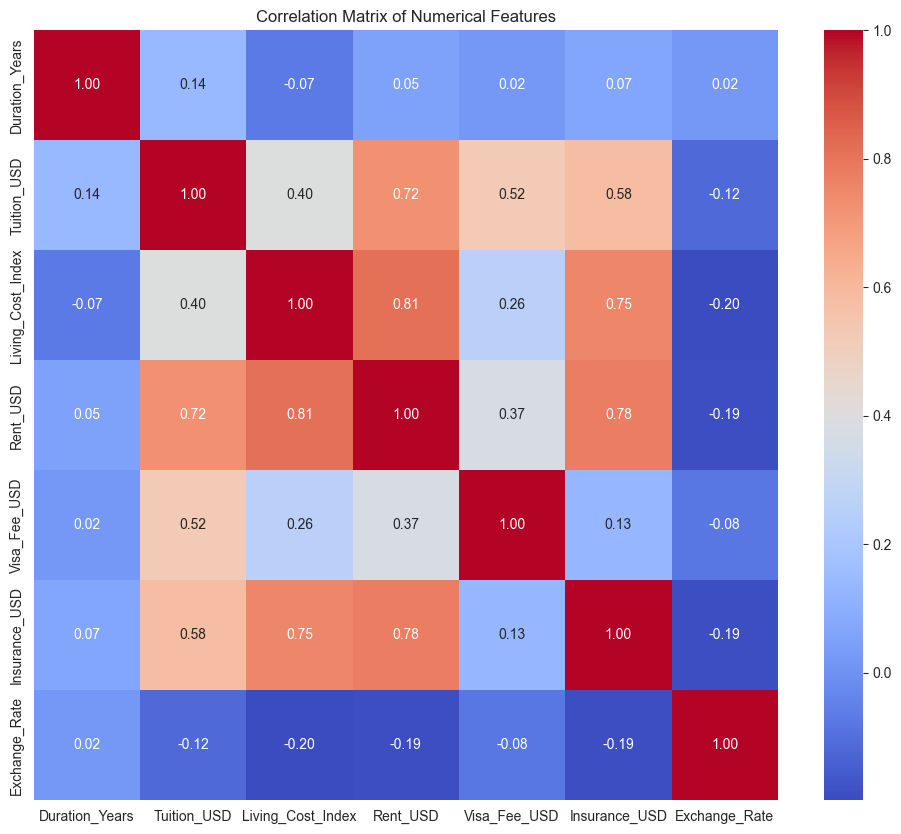

In [69]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") # annot=True shows values
plt.title('Correlation Matrix of Numerical Features')
plt.show()


**No data missing** in each **columns**

## Step 2: Feature Scaling & Data Splitting

In [71]:
#Feature Scaling
# Identify numerical columns for scaling
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['Tuition_USD','Living_Cost_Index','Rent_USD','Visa_Fee_USD','Insurance_USD']

if cols_to_scale: # Use the same cols_to_scale identified earlier
    min_max_scaler = MinMaxScaler()
    # Fit ONLY on training data
    min_max_scaler.fit(df[cols_to_scale])
    
    # Transform
    df[cols_to_scale] = min_max_scaler.transform(df[cols_to_scale])
    
    print("\nNumerical features normalized (Min-Max):")
    print(df[cols_to_scale].describe()) # Min should be ~0, max ~1



Numerical features normalized (Min-Max):
       Tuition_USD  Living_Cost_Index    Rent_USD  Visa_Fee_USD  Insurance_USD
count   907.000000         907.000000  907.000000    907.000000     907.000000
mean      0.269436           0.387288    0.348598      0.380882       0.384675
std       0.267458           0.148587    0.220066      0.318746       0.246442
min       0.000000           0.000000    0.000000      0.000000       0.000000
25%       0.045968           0.301268    0.168085      0.133333       0.192308
50%       0.120968           0.419662    0.319149      0.266667       0.346154
75%       0.501613           0.469345    0.489362      0.444444       0.461538
max       1.000000           1.000000    1.000000      1.000000       1.000000


In [72]:
#Data Splitting
#Split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
if 'Tuition_USD' in df.columns:
    X = df.drop('Tuition_USD', axis=1) # Drop the target variable
    y = df['Tuition_USD'] # Select the target variable
    
    # First split: Separate Test set (e.g., 15%)
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=0.15, random_state=42 # random_state for reproducibility
    )
    
    # Second split: Split remaining data into Train and Validation (e.g., 15% of original -> ~17.6% of train_val)
    val_size_relative = 0.15 / (1 - 0.15) # Calculate proportion for validation set from the remaining data
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_size_relative, random_state=42 # Use same random_state or different?
    )
    
    print("Data Split Shapes:")
    print(f"  X_train: {X_train.shape}")
    print(f"  y_train: {y_train.shape}")
    print(f"  X_val:   {X_val.shape}")
    print(f"  y_val:   {y_val.shape}")
    print(f"  X_test:  {X_test.shape}")
    print(f"  y_test:  {y_test.shape}")
    
    # Important: Now apply scaling/imputation fitted on X_train to X_val and X_test
    # Example assuming 'scaler' was fitted on the original df[cols_to_scale] which corresponds to X_train now
    # scaler = StandardScaler().fit(X_train[cols_to_scale]) # Fit scaler ONLY on X_train
    # X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
    # X_val[cols_to_scale] = scaler.transform(X_val[cols_to_scale])
    # X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
    # Similarly for imputation: fit imputer on X_train, transform X_train, X_val, X_test

else:
    print("Error: 'Tuition_USD' column not found. Cannot split data.")


Data Split Shapes:
  X_train: (634, 11)
  y_train: (634,)
  X_val:   (136, 11)
  y_val:   (136,)
  X_test:  (137, 11)
  y_test:  (137,)


## Step 3: Initialize PyTorch Tensors & Model Definition

In [73]:
import torch

# First, check data types
print("\nOriginal data types:")
print(f"X_train dtype: {X_train.dtypes}")  # This is the pandas DataFrame

# Combine before splitting
X = df.drop('Tuition_USD', axis=1)
y = df['Tuition_USD']

# Apply get_dummies to the whole feature set
X = pd.get_dummies(X, columns=['Country','City','University','Program','Level'])

# Now split
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
val_size_relative = 0.15 / (1 - 0.15)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=val_size_relative, random_state=42)


# Convert to NumPy arrays
X_train_np = X_train.values
y_train_np = y_train.values
X_val_np = X_val.values
y_val_np = y_val.values
X_test_np = X_test.values
y_test_np = y_test.values

# Ensure numeric types
X_train_np = X_train_np.astype(np.float32)
y_train_np = y_train_np.astype(np.float32)
X_val_np = X_val_np.astype(np.float32)
y_val_np = y_val_np.astype(np.float32)
X_test_np = X_test_np.astype(np.float32)
y_test_np = y_test_np.astype(np.float32)

# Now convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_np, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_np, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val_np, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_np, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_np, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_np, dtype=torch.float32).view(-1, 1)

print(X_train_tensor.shape)
print(y_train_tensor.shape)
print(X_train_np.shape)
print(y_train_np.shape)


Original data types:
X_train dtype: Country               object
City                  object
University            object
Program               object
Level                 object
Duration_Years       float64
Living_Cost_Index    float64
Rent_USD             float64
Visa_Fee_USD         float64
Insurance_USD        float64
Exchange_Rate        float64
dtype: object
torch.Size([634, 1350])
torch.Size([634, 1])
(634, 1350)
(634,)


In [ ]:

import torch.nn as nn

class SalesPredictor(nn.Module):
    def __init__(self, input_size, hidden_size1=128, hidden_size2=64, dropout_rate=0.2):
        """
        Initializes the layers of the neural network.
        Args:
            input_size (int): Number of input features.
            hidden_size1 (int): Number of neurons in the first hidden layer.
            hidden_size2 (int): Number of neurons in the second hidden layer.
            dropout_rate (float): Dropout probability.
        """
        super(SalesPredictor, self).__init__() # Initialize the parent nn.Module class
        
        # Define the layers
        self.layer_1 = nn.Linear(input_size, hidden_size1)
        self.relu_1 = nn.ReLU()
        self.dropout_1 = nn.Dropout(dropout_rate)
        
        self.layer_2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu_2 = nn.ReLU()
        self.dropout_2 = nn.Dropout(dropout_rate)
        
        # Output layer: Takes input from the last hidden layer and outputs 1 value (the predicted sales)
        self.output_layer = nn.Linear(hidden_size2, 1) 

    def forward(self, x):
        """
        Defines the forward pass of the network.
        Args:
            x (torch.Tensor): The input tensor.
        Returns:
            torch.Tensor: The output tensor (predicted sales).
        """
        # Pass data through layers
        x = self.layer_1(x)
        x = self.relu_1(x)
        x = self.dropout_1(x) # Apply dropout after activation
        
        x = self.layer_2(x)
        x = self.relu_2(x)
        x = self.dropout_2(x)
        
        # Pass through the output layer (no activation needed for regression typically)
        output = self.output_layer(x)
        return output


# Assuming X_train_tensor is your training features tensor
# Get the number of input features from your data
input_features = X_train_tensor.shape[1] 

# Create an instance of the model
model = SalesPredictor(input_size=input_features)

# Print the model architecture (optional)
print("Model Architecture:")
print(model)

# You can test the forward pass with dummy data (optional)
dummy_input = torch.randn(5, input_features) # Example: 5 samples, input_features columns
dummy_output = model(dummy_input)
print("\nDummy Input Shape:", dummy_input.shape)
print("Dummy Output Shape:", dummy_output.shape)
print("Dummy Output Example:", dummy_output)


Model Architecture:
SalesPredictor(
  (layer_1): Linear(in_features=1350, out_features=128, bias=True)
  (relu_1): ReLU()
  (dropout_1): Dropout(p=0.2, inplace=False)
  (layer_2): Linear(in_features=128, out_features=64, bias=True)
  (relu_2): ReLU()
  (dropout_2): Dropout(p=0.2, inplace=False)
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
)

Dummy Input Shape: torch.Size([5, 1350])
Dummy Output Shape: torch.Size([5, 1])
Dummy Output Example: tensor([[0.0069],
        [0.0020],
        [0.0088],
        [0.1652],
        [0.0275]], grad_fn=<AddmmBackward0>)


## Step 4: Selecting Loss Function & Optimizer

In [75]:
# Choose the loss function
criterion = nn.MSELoss()
print(f"\nSelected Loss Function: {criterion}")



Selected Loss Function: MSELoss()


In [76]:
#3.4 Select Optimizer
import torch.optim as optim

# Choose the optimizer and pass the model's parameters and learning rate
learning_rate = 0.001 # A common starting point for Adam
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# You can also add weight_decay for L2 regularization: optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

print(f"\nSelected Optimizer: {optimizer}")



Selected Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


In [ ]:
print(X_train_tensor.shape)
print(y_train_tensor.shape)
#Ensure the tensors are the shape on (x,)

torch.Size([634, 1350])
torch.Size([634, 1])


## Step 5: Train the Model

In [ ]:
# set up data loaders

from torch.utils.data import TensorDataset, DataLoader

# Assuming you have X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor

# Create TensorDatasets
# Ensure tensors are on the correct device (CPU or GPU - see below)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
# We don't usually need a DataLoader for the test set until final evaluation

# Define batch size (a hyperparameter you might tune later)
batch_size = 64 # Common sizes: 32, 64, 128, 256

# Create DataLoaders
# shuffle=True for training data: ensures batches are different each epoch, helps generalization
# shuffle=False for validation data: order doesn't matter, consistency is good
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False) 

print(f"\nCreated DataLoader with batch size: {batch_size}")
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of validation batches: {len(val_loader)}")

# Example: Iterate through one batch (optional check)
# dataiter = iter(train_loader)
# features_batch, labels_batch = next(dataiter)
# print(f"\nExample batch - Features shape: {features_batch.shape}, Labels shape: {labels_batch.shape}")



Created DataLoader with batch size: 64
Number of training batches: 10
Number of validation batches: 3



Training on device: cpu

Starting training for 50 epochs...
Epoch [1/50], Train Loss: 42.2892, Val Loss: 0.3558
  Validation loss improved to 0.3558. Saving model state.
Epoch [2/50], Train Loss: 52.2699, Val Loss: 1.2999
  Validation loss did not improve. Patience: 1/10
Epoch [3/50], Train Loss: 33.1457, Val Loss: 1.0114
  Validation loss did not improve. Patience: 1/10
Epoch [4/50], Train Loss: 26.1005, Val Loss: 8.5949
  Validation loss did not improve. Patience: 1/10
Epoch [5/50], Train Loss: 14.8203, Val Loss: 0.0793
  Validation loss improved to 0.0793. Saving model state.
Epoch [6/50], Train Loss: 16.7569, Val Loss: 2.8863
  Validation loss did not improve. Patience: 1/10
Epoch [7/50], Train Loss: 10.6217, Val Loss: 4.6726
  Validation loss did not improve. Patience: 1/10
Epoch [8/50], Train Loss: 18.3915, Val Loss: 0.2052
  Validation loss did not improve. Patience: 1/10
Epoch [9/50], Train Loss: 11.7833, Val Loss: 1.0076
  Validation loss did not improve. Patience: 1/10
Epoch

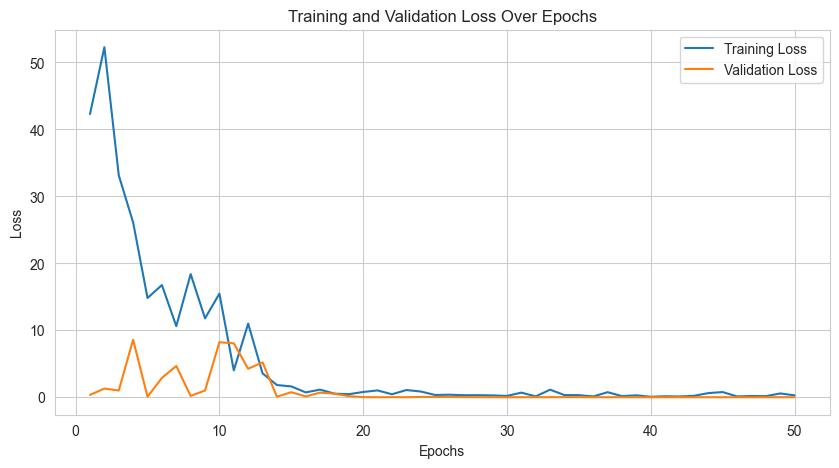

In [ ]:
# Set Up Training Loop
# Assuming model, criterion, optimizer are defined

# Define number of epochs (how many times to iterate over the entire training dataset)
num_epochs = 50 # Start with a reasonable number, can adjust based on monitoring

# --- Optional: GPU Acceleration ---
# Check if GPU is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\nTraining on device: {device}")

# Move model and tensors to the selected device
model.to(device)
# Note: If you move the model to GPU, you MUST also move the data batches to the GPU inside the loop
# X_train_tensor = X_train_tensor.to(device) # Not recommended for large datasets
# y_train_tensor = y_train_tensor.to(device)
# X_val_tensor = X_val_tensor.to(device)
# y_val_tensor = y_val_tensor.to(device)
# Instead, move batches inside the loop: features = features.to(device)
# --------------------------------

# Lists to store loss values for plotting later
train_losses = []
val_losses = []

# 4.8: Early Stopping and Model Checkpointing
best_val_loss = float('inf') # Initialize with a very high value
patience = 10 # Number of epochs to wait for improvement before stopping
patience_counter = 0
best_model_state = None # To store the best model weights


print(f"\nStarting training for {num_epochs} epochs...")

for epoch in range(num_epochs):
    # --- Training Phase --- 
    model.train() # Set model to training mode (enables dropout, batch norm updates)
    running_train_loss = 0.0
    
    # Inner loop: Iterate over batches from train_loader
    for i, (features, labels) in enumerate(train_loader):
        
        # Move batch data to the device (CPU or GPU)
        features = features.to(device)
        labels = labels.to(device)
        
        # 1. Zero gradients
        # Reset gradients from previous batch to avoid accumulation
        optimizer.zero_grad()
        
        # 2. Forward Pass
        # Get model predictions for the current batch
        outputs = model(features)
        
        # 3. Calculate Loss
        # Compare model predictions with actual labels
        loss = criterion(outputs, labels)
        
        # 4. Backward Pass (Backpropagation)
        # Calculate gradients of the loss with respect to model parameters
        loss.backward()
        
        # 5. Optimizer Step
        # Update model weights based on calculated gradients
        optimizer.step()
        
        # Accumulate loss for the epoch
        running_train_loss += loss.item() * features.size(0) # loss.item() gets scalar value, multiply by batch size for correct averaging
        
    # Calculate average training loss for the epoch
    epoch_train_loss = running_train_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)
    
    # --- Validation Phase --- 
    model.eval() # Set model to evaluation mode (disables dropout, uses learned batch norm stats)
    running_val_loss = 0.0
    
    with torch.no_grad(): # Disable gradient calculation during validation (saves memory and computation)
        for features, labels in val_loader:
            features = features.to(device)
            labels = labels.to(device)
            
            outputs = model(features)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item() * features.size(0)
            
    # Calculate average validation loss for the epoch
    epoch_val_loss = running_val_loss / len(val_loader.dataset)
    val_losses.append(epoch_val_loss)
    
    # Print progress (e.g., every epoch or every few epochs)
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}")
    
    # --- Optional: Add Early Stopping and Model Checkpointing here ---
    # --- Early Stopping Logic ---
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        patience_counter = 0 # Reset counter
        # Save the model state (weights) of the best performing model so far
        best_model_state = model.state_dict().copy() # Use .copy() to avoid reference issues
        print(f"  Validation loss improved to {best_val_loss:.4f}. Saving model state.")
    else:
        patience_counter = 1
        print(f"  Validation loss did not improve. Patience: {patience_counter}/{patience}")
        if patience_counter >= patience:
            print(f"\nEarly stopping triggered after {epoch+1} epochs.")
            break # Exit the training loop


print("\nTraining finished.")
# Save the Model
# Method 1: Saving the best model state (integrated with early stopping above)
# The 'best_model_state' variable holds the state_dict in memory.
# To save it to a file after training:
if best_model_state:
    save_path = 'C:/AI/Python Projects/final_sales_model.pt' # .pth or .pt are common extensions
    torch.save(best_model_state, save_path)
    print(f"Best model state saved to {save_path}")


# --- Load the best model state after the loop ---
if best_model_state:
    print("\nLoading best model state found during training.")
    model.load_state_dict(best_model_state)
else:
    print("\nWarning: No best model state saved (perhaps training stopped early or didn't improve).")


# --- Plotting the Losses (Example) ---
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


## Step 6: Model Evaluation

In [ ]:
# Model Evaluation
# Assuming SalesPredictor class definition is available
# Assuming input_features is known (e.g., from the shape of X_test_tensor or saved config)

# Define model architecture instance (must match the saved model's architecture)
# Example: Get input_features from the test set tensor shape
# Make sure X_test_tensor is defined
if 'X_test_tensor' in locals():
    input_features = X_test_tensor.shape[1]
    model_to_evaluate = SalesPredictor(input_size=input_features)
    
    # Define the path where the best model state was saved
    model_path = 'C:/AI/Python Projects/final_sales_model.pt'
    
    # Load the state dictionary
    try:
        # Load the state dict, ensuring it's mapped to the correct device (CPU or GPU)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model_to_evaluate.load_state_dict(torch.load(model_path, map_location=device))
        print(f"Model state loaded successfully from {model_path}")
        
        # Move the model to the appropriate device
        model_to_evaluate.to(device)
        
        # *** CRITICAL: Set the model to evaluation mode ***
        model_to_evaluate.eval()
        print("Model set to evaluation mode.")
        
    except FileNotFoundError:
        print(f"Error: Model file not found at {model_path}. Cannot evaluate.")
        # Handle error - maybe exit or use the last trained model state if available
        model_to_evaluate = None # Indicate failure
    except Exception as e:
        print(f"An error occurred loading the model: {e}")
        model_to_evaluate = None # Indicate failure
else:
    print("Error: X_test_tensor not found. Cannot determine input features or evaluate.")
    model_to_evaluate = None



Model state loaded successfully from C:/AI/Python Projects/final_sales_model.pt
Model set to evaluation mode.


In [ ]:
# Prepare the Test Data
# Assuming X_test_tensor and y_test_tensor are already created and preprocessed (scaled etc.)
# Ensure they are on the correct device
if model_to_evaluate is not None and 'X_test_tensor' in locals() and 'y_test_tensor' in locals():
    X_test_tensor = X_test_tensor.to(device)
    y_test_tensor = y_test_tensor.to(device)
    print("Test tensors moved to device:", device)
else:
    print("Skipping evaluation due to previous errors.")



Test tensors moved to device: cpu


In [ ]:
# Make Predictions on Test Data
# List to store predictions
all_predictions = []

if model_to_evaluate is not None:
    # Use torch.no_grad() to disable gradient calculations - essential for inference
    with torch.no_grad():
        # If test set is large, you might use a DataLoader like for validation
        # test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
        # test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)
        # for features, _ in test_loader: # Don't need labels here, just features
        #     features = features.to(device)
        #     outputs = model_to_evaluate(features)
        #     all_predictions.append(outputs.cpu()) # Move predictions back to CPU for analysis
        
        # If test set fits in memory, predict in one go:
        predictions_tensor = model_to_evaluate(X_test_tensor)
        
        # Move predictions back to CPU for easier analysis with NumPy/Scikit-learn
        predictions_np = predictions_tensor.cpu().numpy()
        actuals_np = y_test_tensor.cpu().numpy()
        
        print("\nPredictions made on the test set.")
        print("Shape of predictions (NumPy array):", predictions_np.shape)
        print("Shape of actuals (NumPy array):", actuals_np.shape)
        
        # Flatten arrays if they have shape (N, 1) to (N,) for some metrics/plotting
        if predictions_np.ndim > 1 and predictions_np.shape[1] == 1:
            predictions_np = predictions_np.flatten()
        if actuals_np.ndim > 1 and actuals_np.shape[1] == 1:
            actuals_np = actuals_np.flatten()

else:
    print("Cannot make predictions as model was not loaded correctly.")




Predictions made on the test set.
Shape of predictions (NumPy array): (137, 1)
Shape of actuals (NumPy array): (137, 1)


In [ ]:
# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

if 'predictions_np' in locals() and 'actuals_np' in locals():
    # Calculate metrics
    mae = mean_absolute_error(actuals_np, predictions_np)
    mse = mean_squared_error(actuals_np, predictions_np)
    rmse = np.sqrt(mse) # Or use mean_squared_error(..., squared=False)
    r2 = r2_score(actuals_np, predictions_np)
    
    print("\nEvaluation Metrics on Test Set:")
    print(f"  Mean Absolute Error (MAE):  {mae:.4f}")
    print(f"  Mean Squared Error (MSE):   {mse:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  R-squared (R²):             {r2:.4f}")
    
    # Optional: Calculate Mean Absolute Percentage Error (MAPE)
    # Be cautious if actuals_np contains zeros!
    # mape = np.mean(np.abs((actuals_np - predictions_np) / actuals_np)) * 100
    # print(f"  Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

else:
    print("Cannot calculate metrics as predictions or actuals are missing.")





Evaluation Metrics on Test Set:
  Mean Absolute Error (MAE):  0.0656
  Mean Squared Error (MSE):   0.0067
  Root Mean Squared Error (RMSE): 0.0822
  R-squared (R²):             0.9045


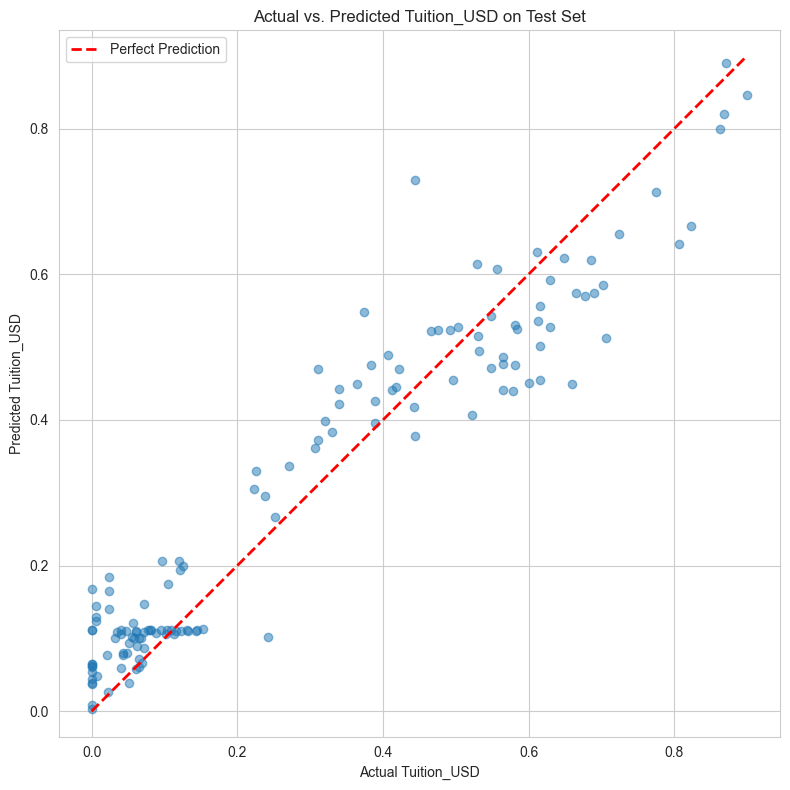

In [ ]:
#Visualize Predictions vs Actuals
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

if 'predictions_np' in locals() and 'actuals_np' in locals():
    plt.figure(figsize=(8, 8))
    plt.scatter(actuals_np, predictions_np, alpha=0.5) # alpha for transparency if points overlap
    
    # Add a line for perfect predictions (y=x)
    min_val = min(actuals_np.min(), predictions_np.min())
    max_val = max(actuals_np.max(), predictions_np.max())
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
    
    plt.title('Actual vs. Predicted Tuition on Test Set')
    plt.xlabel('Actual Tuition')
    plt.ylabel('Predicted Tuition')
    plt.legend()
    plt.grid(True)
    plt.axis('equal') # Ensure x and y axes have the same scale for a proper y=x line
    plt.tight_layout()
    plt.show()
else:
    print("Cannot create scatter plot as predictions or actuals are missing.")



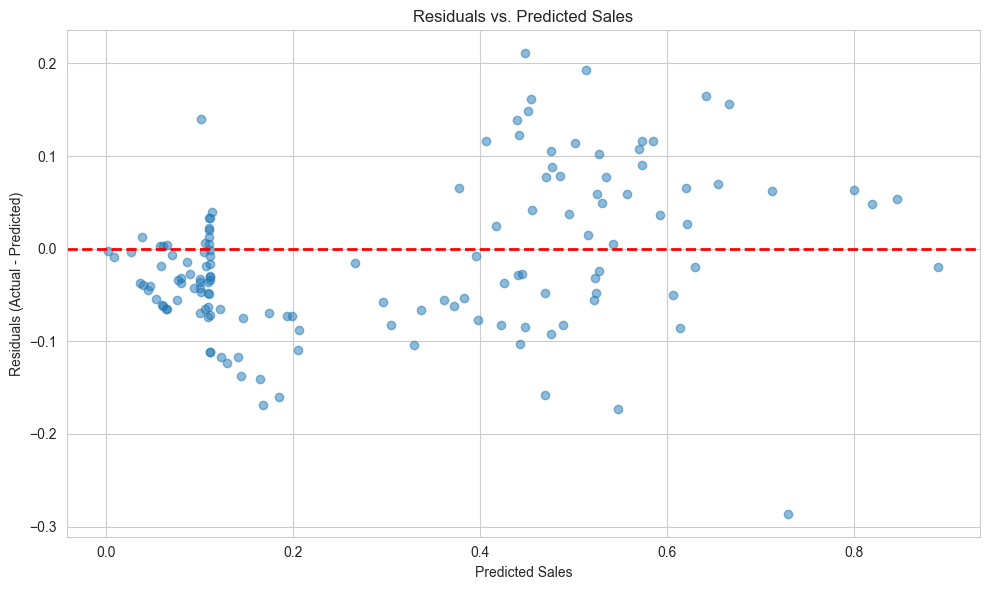

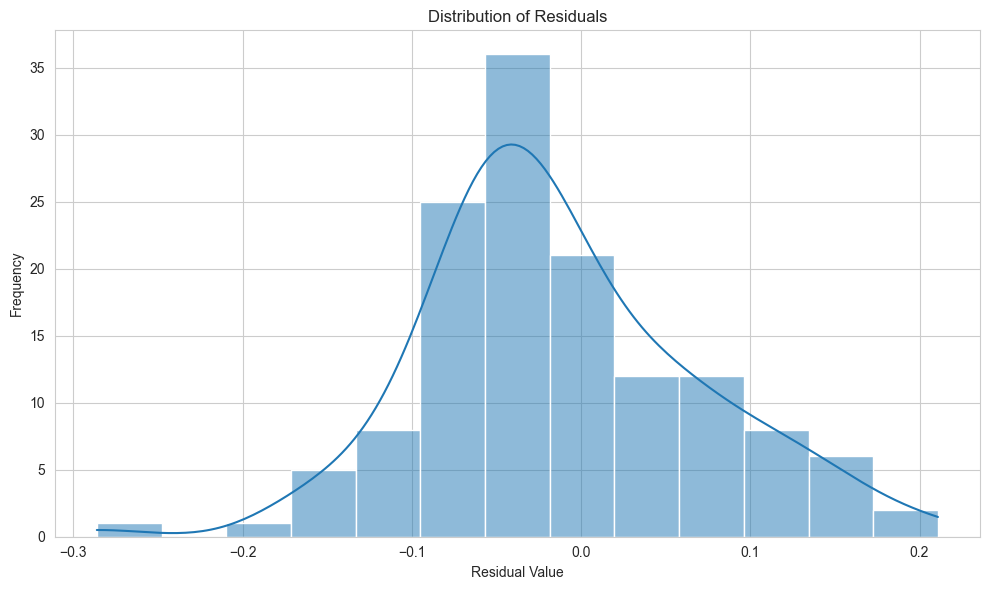

In [ ]:
# Analyze Residuals
# Residuals are the differences between actual and predicted values
if 'predictions_np' in locals() and 'actuals_np' in locals():
    residuals = actuals_np - predictions_np
    
    plt.figure(figsize=(10, 6))
    plt.scatter(predictions_np, residuals, alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2) # Line at zero error
    plt.title('Residuals vs. Predicted Sales')
    plt.xlabel('Predicted Sales')
    plt.ylabel('Residuals (Actual - Predicted)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Optional: Plot histogram of residuals
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.title('Distribution of Residuals')
    plt.xlabel('Residual Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

else:
    print("Cannot analyze residuals as predictions or actuals are missing.")



In [86]:
# Assuming 'final_model' is your trained and tuned model object
# (potentially trained on combined train+validation data with best hyperparameters)
final_model= model_to_evaluate # or the best model from training
final_model_path = 'C:\\AI\\Python Projects\\final_tuned_sales_model.pth'

try:
    # Ensure model is on CPU before saving state_dict for better portability
    final_model.to("cpu") 
    torch.save(final_model.state_dict(), final_model_path)
    print(f"Final model state dictionary saved to: {final_model_path}")
except Exception as e:
    print(f"Error saving final model: {e}")

# Important: Also save other necessary components!
# - The scaler object (fitted on training data)
# - The list of feature names in the exact order the model expects
# - Information about encoding (e.g., categories for one-hot encoding)
# You can use libraries like `joblib` or `pickle` to save these Python objects.

# Example saving a scaler:
# import joblib
# if 'scaler' in locals(): # Assuming 'scaler' is your fitted StandardScaler/MinMaxScaler etc.
#     scaler_path = '/home/ubuntu/sales_data_scaler.joblib'
#     joblib.dump(scaler, scaler_path)
#     print(f"Scaler object saved to: {scaler_path}")

# Example saving feature list:
# if 'X_train' in locals(): # Assuming X_train is your feature DataFrame before tensor conversion
#     feature_list = X_train.columns.tolist()
#     features_path = '/home/ubuntu/model_features.json'
#     import json
#     with open(features_path, 'w') as f:
#         json.dump(feature_list, f)
#     print(f"Feature list saved to: {features_path}")


Final model state dictionary saved to: C:\AI\Python Projects\final_tuned_sales_model.pth


The model has resulted with these stats upon a completion of the training:

Evaluation Metrics on Test Set:
* Mean Absolute Error (MAE):  0.0656
* Mean Squared Error (MSE):   0.0067
* Root Mean Squared Error (RMSE): 0.0822
* R-squared (R²):             0.9045 

The model is also saved for future use. Multiple running of this training ensures the best performing model is saved. For this project, the data and the model were loaded and saved locally.